- https://wikidocs.net/4267 참고함!
# 03. Logistic Regression


## Classification
Linear regression 이 주어진 feature에 따라 continous한 target 값을 추정하는 방법이었다면, classification은 주어진 feature에 따라 데이터를 discrete한 class에 분류하는 방법이다.

예를 들면 받은 e-mail이 스팸인지 아닌지, 어떤 종양이 양성인지 악성인지 등을 판별하는 것이다.

classification에 선형을 사용하는 데는 문제가 있다. target $y$ 는 0 또는 1의 값만 갖는다. 그런데 linear regression의 $h_\theta (x)$ 는 1보다 크거나 0보다 작은 값을 내보낼 수 있다.

따라서 Logistic regression은 hypothesis function이 0과 1 사이의 값만 내보내도록 한다. Logistic regression은 이름에 regression이 들어있긴 하지만 classifier라는 것을 기억하도록 하자.

## 1) Hypothesis Representation

## Logistic Regression Model


Logistic regression 의 hypothesis function은 0과 1 사이의 값만 내보내도록 하려고 한다. 즉, $ 0 \leq h_\theta(x) \leq 1 $

<img src="logreg201.PNG" />

이 함수는 'sigmoid function' 또는 'logistic function' 이라고 불린다.

## Interpretation of Hypothesis Output


$y=1$ (class 1)일 확률과 $y=0$
(class 0)일 확률은 합이 1이 되어야 한다는 사실을 기억해두자.

$ P(y=0| x;\theta) + P(y=1| x; \theta) = 1 $ 

## 2) Decision Boundary

규칙은 간단하다. Hypothesis function이 0.5가 넘으면 Class 1에, 0.5 가 되지 않으면 Class 0에 넣기로 하자.

Suppose predict

$
y=
\begin{cases}
1 & \text{if } h_\theta(x) \ge 0.5, z\ge0 \\
0 & \text{if } h_\theta(x) < 0.5, z<0 
\end{cases}
$
- z = 0 가 기준선인 거지!! 

그런데 hypothesis function $h_\theta(x)=g(x)$이 0.5 이상이 되는 경우는 $z=\theta^{T}x\geq0$ 일 때이다. 그리고 0.5 이하가 되는 경우는 $\theta^{T}x<0$일 때이다. 즉, $\theta^{T}x=0$ 일 때를 기준으로 class 가 나뉘게 된다.

$
y=
\begin{cases}
1 & \text{if } \theta^T x \ge 0 \\
0 & \text{if } \theta^T x < 0 
\end{cases}
$

가령 다음과 같은 data를 가지고 있을 때, 모종의 방법으로 최적의 parameter $θ$ 를 찾았다고 하자.

- 위 그림 z 공간에서 실제 feature 공간에서는 어떻게 분류되는지 궁금해서 그려보면 아래와 같다!! 

<img src="logreg303.PNG" />

이 최적의 parameter를 가지고 다음과 같은 결론을 내릴 수 있다.

Predict $y=1$ if

$ \underbrace{-3 + x_1 + x_2 }_{ \color{royalblue}{\theta^T x}} \ge 0 $
- ↑ z=0 이 기준이기 때문에!! 

$ i.e. x_1 +x_2 \ge 3 $ 

So, Decision boundary:

$ h_\theta (x) = 0.5 $ i.e. $\color{royalblue}{\theta^T x}=0$ 

즉, $\color{royalblue}{\theta^{T}x} = -3 + x_1 + x_2 \geq 0$ 이면 Class 1 ($y=1$)에 넣고 그렇지 않으면 Class 0 ($y=0$)에 넣는다. 이 때의 decision boundary는 $-3+x_1+x_2=0$ 이다. 즉, 위 그림에서 녹색으로 표시된 선에 해당한다. 이제 training set에 들어있지 않았던, 새로운 데이터가 나타나면 $x1$ 값과 $x2$ 값을 이용하여 좌표를 찍어보고, decision boundary보다 위쪽에 찍히면 class 1에, 아래쪽에 찍히면 class 0에 넣으면 되는 것이다.


이 때, **decision boundary**는 $θ$ 에 의해 결정되는 것임을 기억하자. Training data는 parameter를 결정하는 데에 이용될 뿐, decision boundary 에 직접적으로 영향을 미치지는 않는다.

eg) x와 o가 트레이닝 데이터 인데,, 그것들이 decision boundary를 결정하지 않지 $\theta$가 결정한다!! 

## Non-Linear Decision Boundaries


<img src="logreg305.PNG" />

## 3) Cost Function & Gradient Descent


Linear regression의 cost function의 LSE criterion을 그대로 사용하면 logsitic regression 의 cost function은 non-convex function이 된다. 그래서 logistic regression의 cost funciton은 조금 다른 형태를 갖는다.

## Logistic Regression Cost Function


(log를 씌우는 이유는 울퉁불퉁한 그래프의 local minimum을 없애고 매끄럽게 만들기 위해서 이다!!, convex 만들기 위해서 log를 취함!! )
<img src="lec_05_08.png" />
- http://pythonkim.tistory.com/22 참고

Logistic regression 의 cost function을 다음과 같이 정의한다.

$
\text{cost}\left( h_\theta (x), y \right) = 
\begin{cases}
-\log(h_\theta (x)) & \text{if }  y=1 \\
-\log(1-h_\theta (x)) & \text{if } y=0
\end{cases}
$

$y=1$ 일 때 cost function 의 특징은,
- $cost = 0$ when $h_\theta (x) =1$ 
- $\text{cost} \to \infty$ as $h_\theta (x) \to 0$

예측을 잘 못한 경우 penalty를 주는 거다. 정리하자면 다음과 같다!

$
J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \text{cost}\left( h_\theta ( x^{(i)}), y^{(i)} \right)
$

where, $ \text{cost}\left( h_\theta (x), y \right) = 
\begin{cases}
-\log(h_\theta (x)) & \text{if }  y=1 \\
-\log(1-h_\theta (x)) & \text{if } y=0
\end{cases}
$

- 간단하게 표현하면

$
\text{cost} \left( h_\theta (x), y  \right) =
\color{royalblue}{-} y     \color{royalblue}{\log\left( h_\theta (x) \right)} 
\color{salmon}{-} (1-y)    \color{salmon}{\log\left( 1-h_\theta (x) \right)}
$

$
\begin{eqnarray}
\because
& & \text{if } y=1, \text{cost}(h,y) = \color{royalblue}{-\log\left( h_\theta (x) \right)}  \\
& & \text{if } y=0, \text{cost}(h,y) = \color{salmon}   {-\log\left( 1- h_\theta (x) \right)}
\end{eqnarray}
$

최종적으로, logistic regression의 cost function은 다음과 같이 표현한다.

$
J(\theta) = - \frac{1}{m} 
\sum_{i=1}^{m} \left[ 
y^{(i)} \log h_\theta (x) +
(1-y^{(i)}) \log \left( 1-h_\theta (x) \right)
\right]
$

이 cost function의 특징은,
1. Maximum likelihood estimation criterion
2. **Convex**

이제 최적의 prameter $\theta$를 찾으려면 $\min_{\theta} J(\theta)$를 구하고, 그 후에 주어진 새로운 $x$를 어떤 class에 넣을지 판단하려면 $h_{\theta}(x)=\frac{1}{1+\exp(-\theta^{T}x)}$가 0.5보다 큰지 작은지를 확인하면 된다.

## Gradient Descent

$
J(\theta) = - \frac{1}{m} 
\sum_{i=1}^{m} \left[ 
y^{(i)} \log h_\theta (x) +
(1-y^{(i)}) \log \left( 1-h_\theta (x) \right)
\right]
$

이 cost function을 최소화하는 parameter $θ$를 찾는 것이 목적이다. $J(θ)$가 convex이므로, gradient descent에 의해 optimal $θ$를 찾을 수 있다. 즉,

Repeat{ 

$ \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta) $

} simultaneously update all $\theta_j$

이 때,

$
\frac{\partial}{\partial \theta_j} J(\theta)
= \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$

이 수식만 보면 linear regression의 gradient descent와 동일하다. 유일한 차이점은 hypothesis function이 $h_\theta (x) = \frac{1}{1+\exp(-\theta^{T} x)}$ 로 바뀐 것이다. 

(이 cost function은 non-convex 돼서 다른 cost function 만든 거 아니었음??)

=> log를 씌워줘서 convex를 만들어 줬을 뿐이다 cost function 그래서 다른 cost function이라고 한거임

=> hypothesis function과 cost function을 헷갈리면 안된다!! 

## 4) Advanced Optimization

Gradient descent 외에도 optimization algorithm이 여럿 있다. 예를 들면, conjugate gradient, BFGS, L-BFGS 등이다.

이 알고리즘의 장점은 learning rate αα 를 자동으로 골라주며, gradient descent보다 빠른 경우가 많다는 점인데, 복잡하고 이해하기 어렵다.

이 강의에서는 이러한 optimization 알고리즘들에 관해 자세히 다루지는 않고, 간략히 소개만 해주었다.

## 5) Multi-Class Classification

<img src="logreg703.PNG" />

# Machine Learning in Action Ch05 봄

# ch05. Logistic regression

General approach to logistic regression (로지스틱 회귀의 일반적인 접근 방법)
1. Collect: 
    - Any method.
2. Prepare: 
    - Numeric values are needed for a distance calculation. A structured data format is best.
3. Analyze: 
    - Any method.
4. Train: 
    - We’ll spend most of the time training, where we try to find optimal coefficients to classify our data.
5. Test: 
    - Classification is quick and easy once the training step is done.
6. Use: 
    - This application needs to get some input data and output structured numeric values. Next, the application applies the simple regression calculation on this input data and determines which class the input data should belong to. The application then takes some action on the calculated class.

## 5.1 Classification with logistic regression and the sigmoid function: a tractable step function

- Logistic regression
- Pros: Computationally inexpensive, easy to implement, knowledge representation easy to interpret
- Cons: Prone to underfitting, may have low accuracy 
- Works with: Numeric values, nominal values


- sigmoid = logistic / unit step function(단위 계단 함수) = heaviside function
- n 차원은 항상 n-1 차원으로 나눠진다! => 이 n-1차원을 hyperplane(초평명) 이라 한다!!

## 5.2 Using optimization to find the best regression coefficients

### 5.2.1 Gradient ascent
책은 ascent네, 주로 descent를 사용 했는데!! 하지만 원리는 가다고 보면 된다.

ascent이기 때문에 위로 올라가지 + 임

### 5.2.2 Train: using gradient ascent to find the best parameters
#### Listing 5.1 Logistic regression gradient ascent optimization functions

In [2]:
from numpy import *

def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])]) 
        # x0 x1 x2   독립변수 들어감! 
        labelMat.append(int(lineArr[2]))
        # 1,0,1,0,,, 종속변수 들어감! 
    return dataMat,labelMat

def sigmoid(inX): # inX에 z를 넣을 것이다 이는 t(W)X 임! Transposed_W * X
    # 100x1
    return 1.0/(1+exp(-inX))

def gradAscent(dataMatIn, classLabels): # 100x3, 1x100
    dataMatrix = mat(dataMatIn)             #convert to NumPy matrix (행렬로 변환)
    # 100 x 3
    labelMat = mat(classLabels).transpose() #convert to NumPy matrix
    # 100 x 1
    m,n = shape(dataMatrix) # matrix 행, 열 반환!! 
    alpha = 0.001
    maxCycles = 500
    weights = ones((n,1)) # 3 x 1
    for k in range(maxCycles):              #heavy on matrix operations
        h = sigmoid(dataMatrix*weights)     #matrix mult
        error = (labelMat - h)              #vector subtraction
                 #100x1
        # **Gradiant descent algorithm 적용부분!!**

        weights = weights + alpha * dataMatrix.transpose()* error #matrix mult
        # 3 x 1                       # 3 x 100           # 100x1
        # ascent 니까 weight에 +해주지!! 
    return weights


- https://stackoverflow.com/questions/22594063/what-is-the-difference-between-gradient-descent-and-gradient-ascent/22594406#22594406
- weights 변경 식 설명 참고 link ↑

In [3]:
import numpy as np

In [4]:
import logRegres

In [6]:
dataArr, labelMat = logRegres.loadDataSet()

In [7]:
print dataArr  # 독립변수
print labelMat # 종속변수

[[1.0, -0.017612, 14.053064], [1.0, -1.395634, 4.662541], [1.0, -0.752157, 6.53862], [1.0, -1.322371, 7.152853], [1.0, 0.423363, 11.054677], [1.0, 0.406704, 7.067335], [1.0, 0.667394, 12.741452], [1.0, -2.46015, 6.866805], [1.0, 0.569411, 9.548755], [1.0, -0.026632, 10.427743], [1.0, 0.850433, 6.920334], [1.0, 1.347183, 13.1755], [1.0, 1.176813, 3.16702], [1.0, -1.781871, 9.097953], [1.0, -0.566606, 5.749003], [1.0, 0.931635, 1.589505], [1.0, -0.024205, 6.151823], [1.0, -0.036453, 2.690988], [1.0, -0.196949, 0.444165], [1.0, 1.014459, 5.754399], [1.0, 1.985298, 3.230619], [1.0, -1.693453, -0.55754], [1.0, -0.576525, 11.778922], [1.0, -0.346811, -1.67873], [1.0, -2.124484, 2.672471], [1.0, 1.217916, 9.597015], [1.0, -0.733928, 9.098687], [1.0, -3.642001, -1.618087], [1.0, 0.315985, 3.523953], [1.0, 1.416614, 9.619232], [1.0, -0.386323, 3.989286], [1.0, 0.556921, 8.294984], [1.0, 1.224863, 11.58736], [1.0, -1.347803, -2.406051], [1.0, 1.196604, 4.951851], [1.0, 0.275221, 9.543647], [1.0,

In [8]:
np.mat?

In [9]:
reload(logRegres)

<module 'logRegres' from 'logRegres.py'>

In [10]:
logRegres.gradAscent(dataArr, labelMat)

[[  1.00000000e+00  -1.76120000e-02   1.40530640e+01]
 [  1.00000000e+00  -1.39563400e+00   4.66254100e+00]
 [  1.00000000e+00  -7.52157000e-01   6.53862000e+00]
 [  1.00000000e+00  -1.32237100e+00   7.15285300e+00]
 [  1.00000000e+00   4.23363000e-01   1.10546770e+01]
 [  1.00000000e+00   4.06704000e-01   7.06733500e+00]
 [  1.00000000e+00   6.67394000e-01   1.27414520e+01]
 [  1.00000000e+00  -2.46015000e+00   6.86680500e+00]
 [  1.00000000e+00   5.69411000e-01   9.54875500e+00]
 [  1.00000000e+00  -2.66320000e-02   1.04277430e+01]
 [  1.00000000e+00   8.50433000e-01   6.92033400e+00]
 [  1.00000000e+00   1.34718300e+00   1.31755000e+01]
 [  1.00000000e+00   1.17681300e+00   3.16702000e+00]
 [  1.00000000e+00  -1.78187100e+00   9.09795300e+00]
 [  1.00000000e+00  -5.66606000e-01   5.74900300e+00]
 [  1.00000000e+00   9.31635000e-01   1.58950500e+00]
 [  1.00000000e+00  -2.42050000e-02   6.15182300e+00]
 [  1.00000000e+00  -3.64530000e-02   2.69098800e+00]
 [  1.00000000e+00  -1.96949

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])


$ \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta) $

$ 0 \leq h_\theta(x) \leq 1 $

${\theta^{T}x}$

$ h_w(z) = \frac{1}{1+exp(-z)}$

$z = W^{T}X = [w_0 w_1 w_2][x_0 x_1 x_2]^{T} \\ (x_0 = 1) $

$w_0 + w_1x_1 + x_2w_2 = 4.12 + 0.48x_1 - 0.61x_2 = 0$

인 $x_1, x_2$ 로 구성된 차원의 선을 그릴 수 있지 그 Decision Boundary data들이 분리되는 것이다

In [13]:
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat,labelMat=loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0] 
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()

In [16]:
reload(logRegres)

<module 'logRegres' from 'logRegres.py'>

In [19]:
weights = logRegres.gradAscent(dataArr, labelMat)

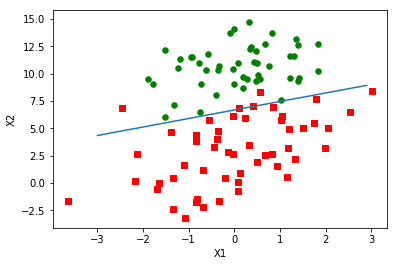

In [22]:
logRegres.plotBestFit(weights.getA())
# getA는 array로 변환해주는 함수!! 